<a href="https://colab.research.google.com/github/Sakthivel-95/Churn-Prediction-ML/blob/main/cus_churn_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##cleaning


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv("/content/churn.csv")

# Display initial dataset shape
print(f"Original dataset shape: {df.shape}")

# Handling missing values (removing rows with missing values)
df.dropna(inplace=True)

# Removing duplicate entries
df.drop_duplicates(inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['Surname', 'Geography', 'Gender']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Storing encoders for future use

# Scaling numerical features
scaler = StandardScaler()
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display cleaned dataset shape
print(f"Cleaned dataset shape: {df.shape}")

# Save cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

print("Dataset cleaned and saved as 'cleaned_dataset.csv'")

Original dataset shape: (10000, 14)
Cleaned dataset shape: (10000, 14)
Dataset cleaned and saved as 'cleaned_dataset.csv'


##EDA


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/cleaned_dataset.csv")
# Display basic information
print("Dataset Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 1.1 MB
Dataset Info:
 None

Summary Statistics:
          RowNumber    CustomerId       Surname   CreditScore    

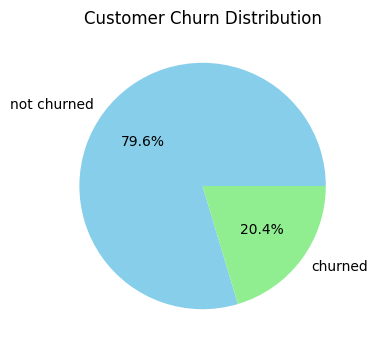

In [ ]:
# Create a mapping for churn labels
churn_labels = {0: 'not churned', 1: 'churned'}

# Apply the mapping to the 'Exited' column for plotting
churn_data = df['Exited'].map(churn_labels).value_counts()

plt.figure(figsize=(6, 4))
churn_data.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title("Customer Churn Distribution")
plt.ylabel("") # Remove default y-label for pie chart
plt.show()

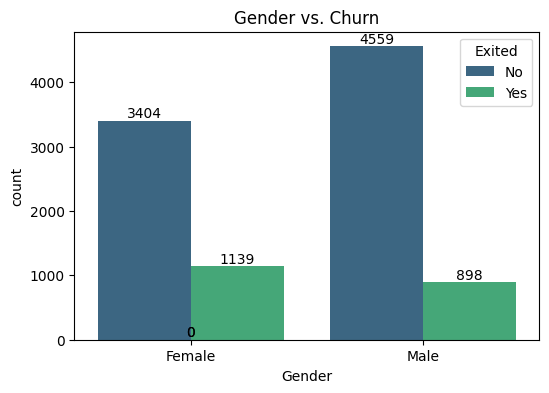

In [ ]:
# Create a mapping for gender labels
gender_labels = {0: 'Female', 1: 'Male'}

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', hue='Exited', data=df, palette='viridis')
plt.title("Gender vs. Churn")
# Set the x-axis tick labels
plt.xticks(ticks=[0, 1], labels=[gender_labels[0], gender_labels[1]])

# Add exact counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

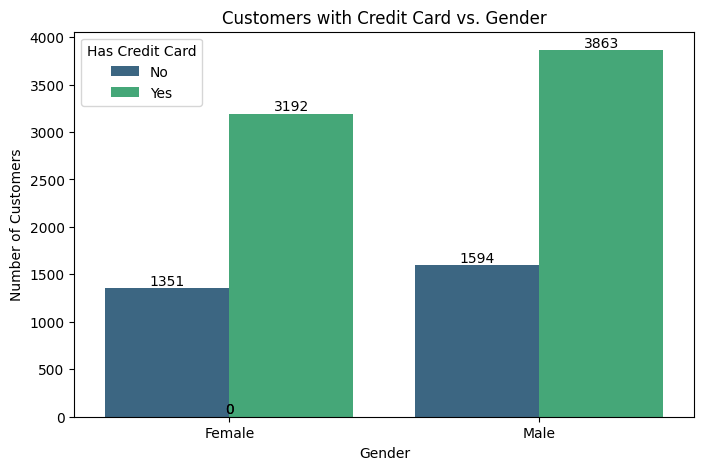

In [ ]:
# Create a mapping for gender labels (if not already defined)
gender_labels = {0: 'Female', 1: 'Male'}

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Gender', hue='HasCrCard', data=df, palette='viridis')
plt.title("Customers with Credit Card vs. Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.xticks(ticks=[0, 1], labels=[gender_labels[0], gender_labels[1]]) # Set the x-axis tick labels

# Add exact counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.legend(title='Has Credit Card', labels=['No', 'Yes']) # Add legend
plt.show()

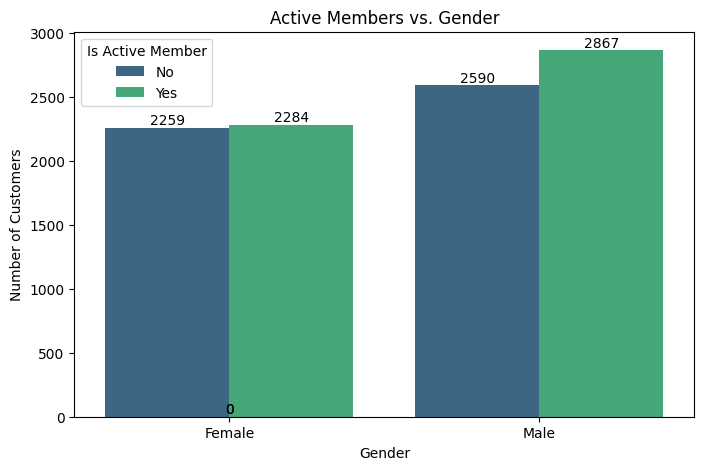

In [ ]:
# Create a mapping for gender labels (if not already defined)
gender_labels = {0: 'Female', 1: 'Male'}

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Gender', hue='IsActiveMember', data=df, palette='viridis')
plt.title("Active Members vs. Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.xticks(ticks=[0, 1], labels=[gender_labels[0], gender_labels[1]]) # Set the x-axis tick labels

# Add exact counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.legend(title='Is Active Member', labels=['No', 'Yes']) # Add legend
plt.show()

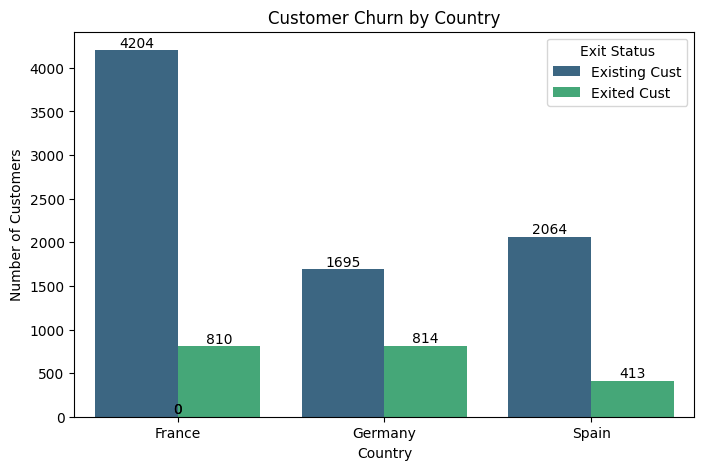

In [ ]:
# Create a mapping for churn labels (if not already defined)
churn_labels = {0: 'Existing Cust', 1: 'Exited Cust'}

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Geography', hue='Exited', data=df, palette='viridis')
plt.title("Customer Churn by Country")
plt.xlabel("Country")
plt.ylabel("Number of Customers")

# Get the original country names from the LabelEncoder
# Assuming you stored the encoder in a dictionary called label_encoders
geography_labels = label_encoders['Geography'].classes_

# Set the x-axis tick labels with the original country names
plt.xticks(ticks=range(len(geography_labels)), labels=geography_labels)


# Add exact counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.legend(title='Exit Status', labels=[churn_labels[0], churn_labels[1]]) # Add legend
plt.show()

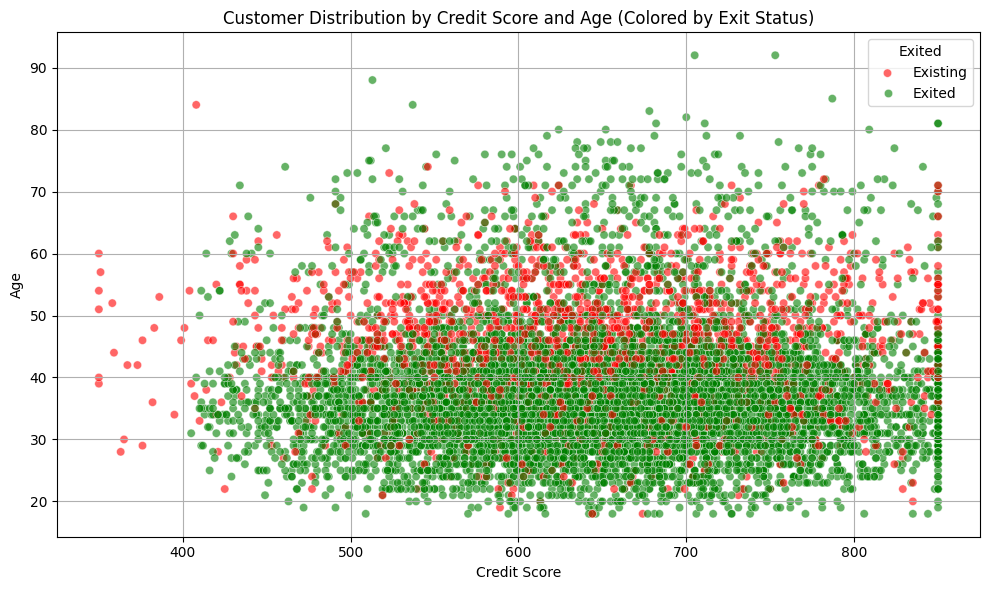

In [ ]:

df = pd.read_csv("/content/churn.csv")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='CreditScore',
    y='Age',
    hue='Exited',
    palette={0: 'green', 1: 'red'},
    alpha=0.6
)

plt.title('Customer Distribution by Credit Score and Age (Colored by Exit Status)')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.legend(title='Exited', labels=['Existing', 'Exited'])
plt.grid(True)
plt.tight_layout()
plt.show()


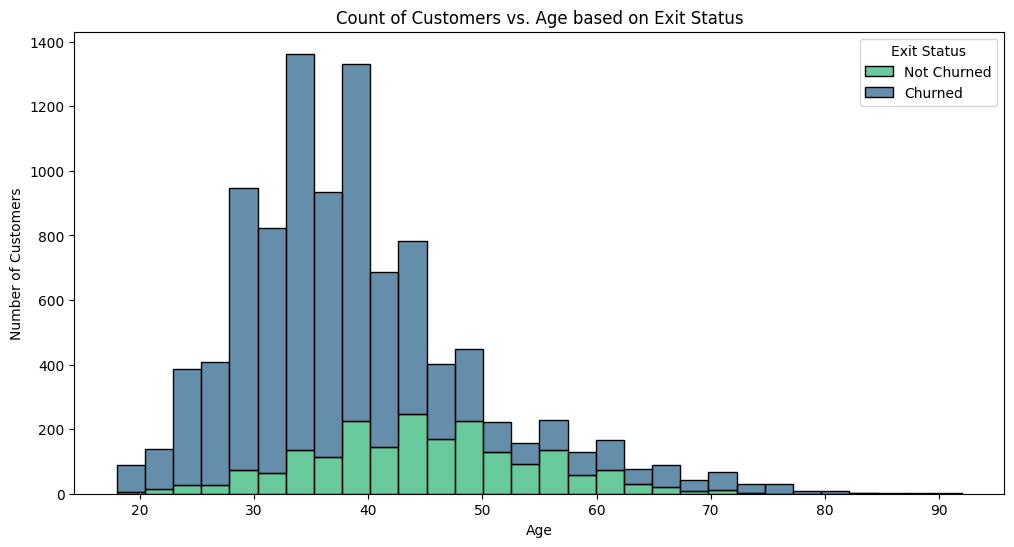

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Exited', multiple="stack", bins=30, kde=False, palette='viridis')
plt.title("Count of Customers vs. Age based on Exit Status")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.legend(title='Exit Status', labels=['Not Churned', 'Churned']) # Add a legend
plt.show()

/tmp/ipython-input-11-1708409921.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df, palette='viridis')


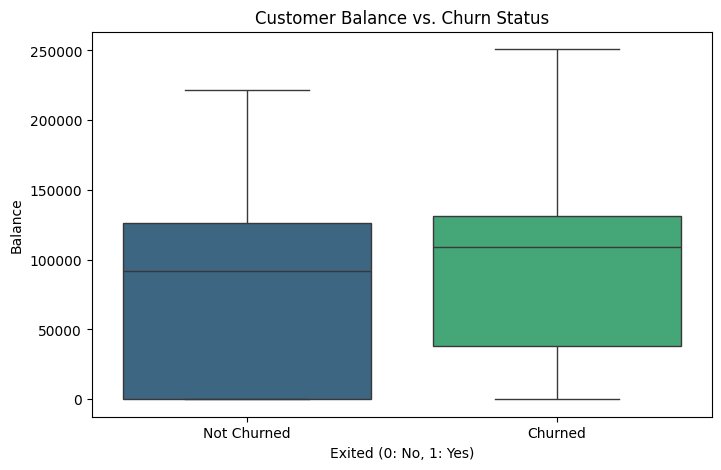

/tmp/ipython-input-11-1708409921.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='EstimatedSalary', data=df, palette='viridis')


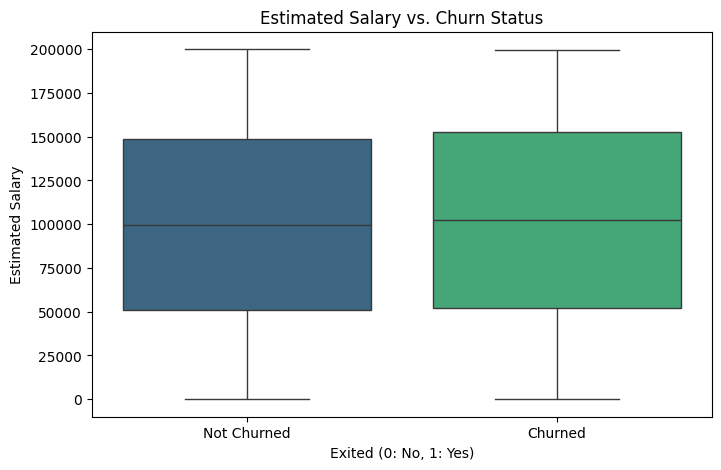

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Balance vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Balance', data=df, palette='viridis')
plt.title("Customer Balance vs. Churn Status")
plt.xlabel("Exited (0: No, 1: Yes)")
plt.ylabel("Balance")
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned']) # Set the x-axis tick labels
plt.show()

# Plot EstimatedSalary vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, palette='viridis')
plt.title("Estimated Salary vs. Churn Status")
plt.xlabel("Exited (0: No, 1: Yes)")
plt.ylabel("Estimated Salary")
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned']) # Set the x-axis tick labels
plt.show()

/tmp/ipython-input-12-196717921.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Tenure', data=df, palette='viridis')


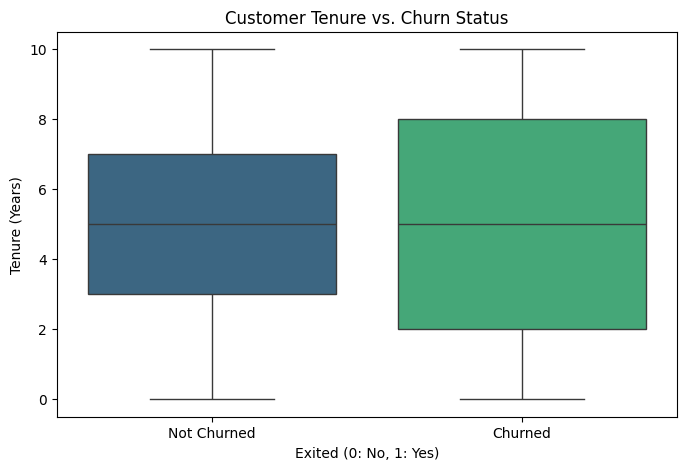

/tmp/ipython-input-12-196717921.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='CreditScore', data=df, palette='viridis')


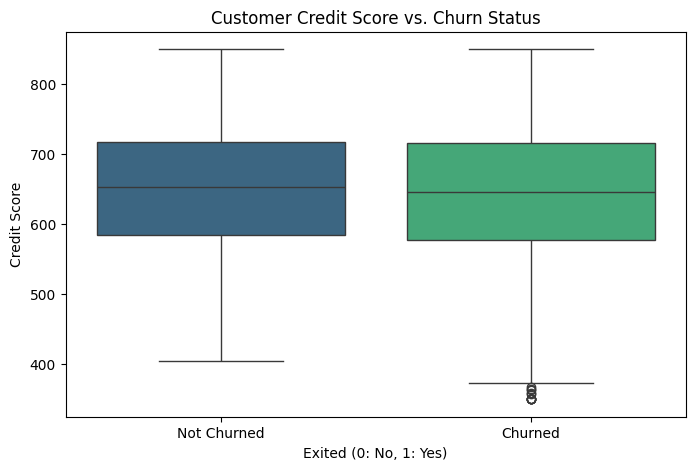

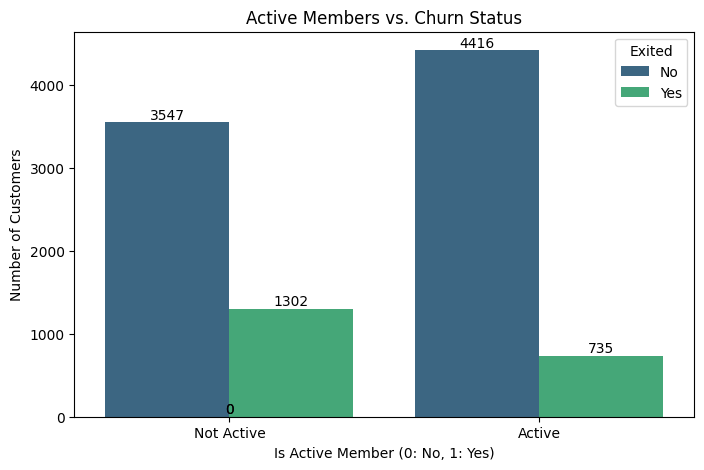

/tmp/ipython-input-12-196717921.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='NumOfProducts', data=df, palette='viridis')


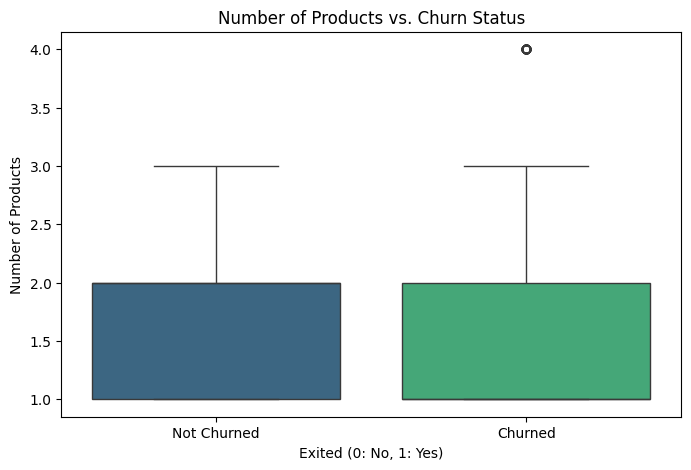

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Churn vs Tenure
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Tenure', data=df, palette='viridis')
plt.title("Customer Tenure vs. Churn Status")
plt.xlabel("Exited (0: No, 1: Yes)")
plt.ylabel("Tenure (Years)")
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned']) # Set the x-axis tick labels
plt.show()

# Plot Churn vs Credit Score
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='CreditScore', data=df, palette='viridis')
plt.title("Customer Credit Score vs. Churn Status")
plt.xlabel("Exited (0: No, 1: Yes)")
plt.ylabel("Credit Score")
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned']) # Set the x-axis tick labels
plt.show()

# Plot Churn vs Active Members
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='viridis')
plt.title("Active Members vs. Churn Status")
plt.xlabel("Is Active Member (0: No, 1: Yes)")
plt.ylabel("Number of Customers")
plt.xticks(ticks=[0, 1], labels=['Not Active', 'Active']) # Set the x-axis tick labels

# Add exact counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()


# Plot Churn vs Number of Products
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='NumOfProducts', data=df, palette='viridis')
plt.title("Number of Products vs. Churn Status")
plt.xlabel("Exited (0: No, 1: Yes)")
plt.ylabel("Number of Products")
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned']) # Set the x-axis tick labels
plt.show()

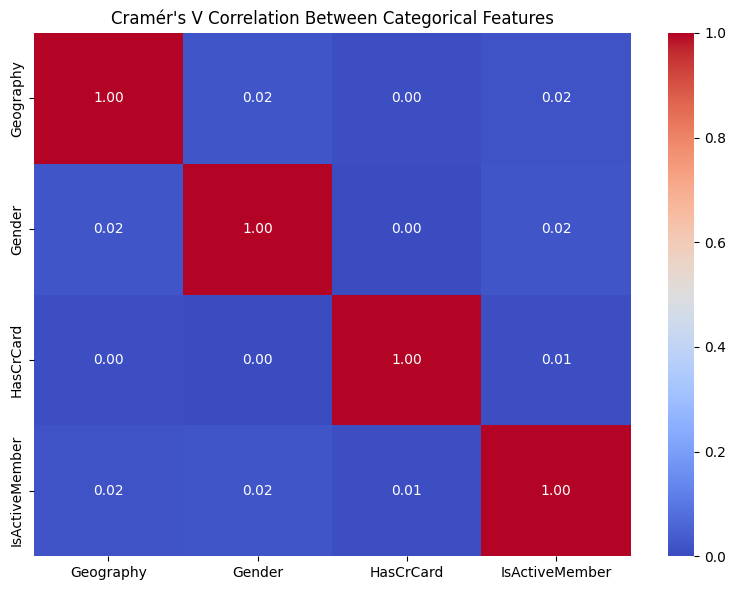

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # Bias correction
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Example: Load your cleaned dataset
df = pd.read_csv("/content/churn.csv")

# Select only categorical columns
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Create a correlation matrix
corr_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to float type for heatmap
corr_matrix = corr_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Correlation Between Categorical Features")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

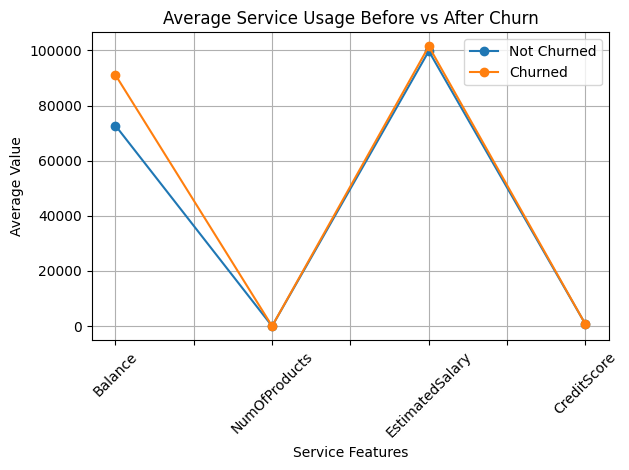

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("/content/churn.csv")

# Define service usage features
service_features = ['Balance', 'NumOfProducts', 'EstimatedSalary', 'CreditScore']

# Group by 'Exited' and calculate mean for each service usage feature
usage_by_churn = df.groupby('Exited')[service_features].mean().T

# Rename the columns for clarity
usage_by_churn.columns = ['Not Churned', 'Churned']

# Plot line chart
plt.figure(figsize=(10, 6))
usage_by_churn.plot(kind='line', marker='o')
plt.title("Average Service Usage Before vs After Churn")
plt.ylabel("Average Value")
plt.xlabel("Service Features")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##churn rate


In [ ]:

print("Total customers:", len(df))
print("Customers who exited:", df['Exited'].sum())

# Calculate churn rate
churn_rate = (df['Exited'].sum() / len(df)) * 100

# Round to 2 decimal places
print(f"Churn Rate: {churn_rate:.2f}%")


Total customers: 10000
Customers who exited: 2037
Churn Rate: 20.37%


##Model training


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



In [ ]:
 df = pd.read_csv('/content/cleaned_dataset.csv')


In [ ]:
# Drop non-feature columns
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])

In [ ]:
# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Target column
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_log)
print(classification_report(y_test, y_pred_log))

# Print ROC AUC score
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)
print(f"Logistic Regression ROC AUC: {roc_auc_log:.2f}")

Logistic Regression Results:
Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Logistic Regression ROC AUC: 0.76


In [ ]:
# Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Decision Tree Results:")
print("Accuracy:", accuracy_tree)
print(classification_report(y_test, y_pred_tree))

# Print ROC AUC score
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)
print(f"Decision Tree ROC AUC: {roc_auc_tree:.2f}")

Decision Tree Results:
Accuracy: 0.781
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.45      0.53      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.78      0.79      2000

Decision Tree ROC AUC: 0.68


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Results:")
print("Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print(f"Random Forest ROC AUC: {roc_auc_rf:.2f}")

Random Forest Results:
Accuracy: 0.864
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Random Forest ROC AUC: 0.86


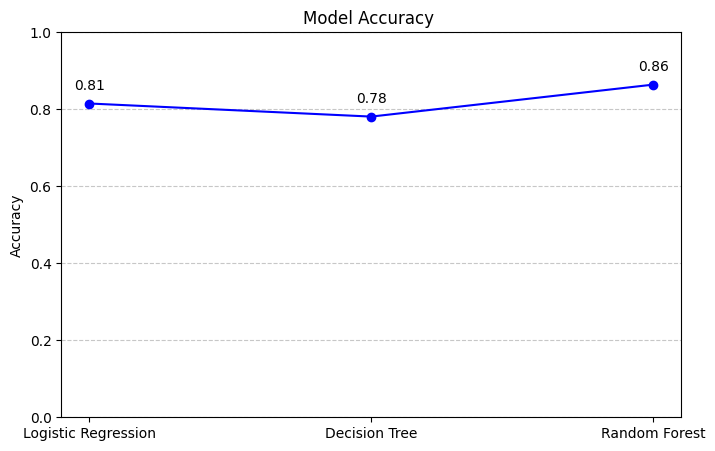

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [accuracy_log, accuracy_tree, accuracy_rf]

plt.figure(figsize=(8, 5))
plt.plot(models, accuracy_scores, marker='o', linestyle='-', color='blue')

for i, txt in enumerate(accuracy_scores):
    plt.annotate(f'{txt:.2f}', (models[i], accuracy_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.ylabel('Accuracy')
plt.title('Model Accuracy ')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

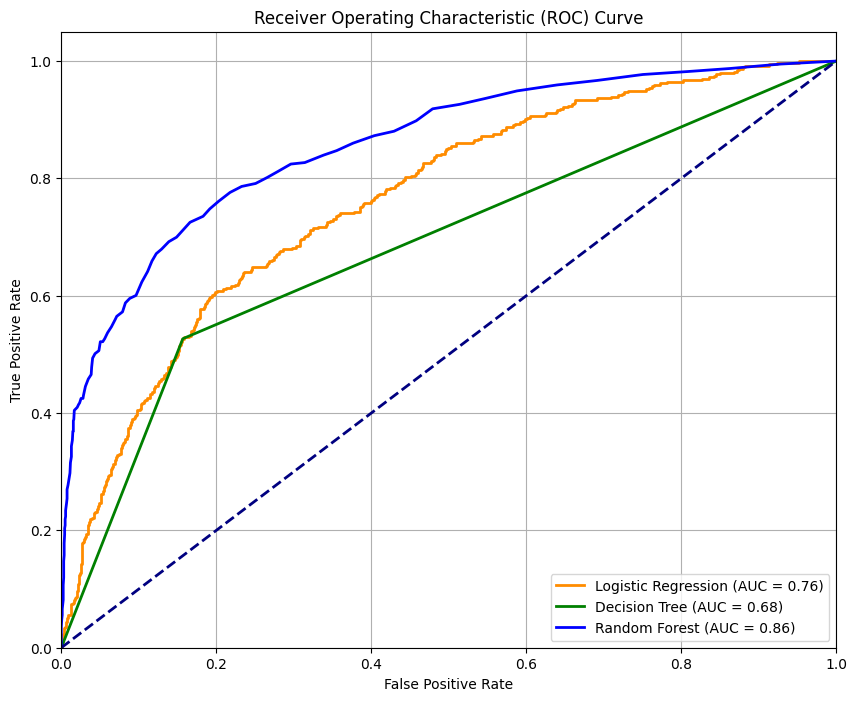

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print("Accuracy:", accuracy_xgb)
print(classification_report(y_test, y_pred_xgb))

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
print(f"XGBoost ROC AUC: {roc_auc_xgb:.2f}")

XGBoost Results:
Accuracy: 0.8555
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.86      0.85      2000

XGBoost ROC AUC: 0.85


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

print("Best hyperparameters for Random Forest (RandomizedSearchCV):")
print(random_search_rf.best_params_)

Best hyperparameters for Random Forest (RandomizedSearchCV):
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}


In [ ]:
best_rf_model = RandomForestClassifier(n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_depth=10, random_state=42)

best_rf_model.fit(X_train, y_train)

y_pred_best_rf = best_rf_model.predict(X_test)
y_prob_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Random Forest Results (with best hyperparameters):")
print("Accuracy:", accuracy_best_rf)
print(classification_report(y_test, y_pred_best_rf))

fpr_best_rf, tpr_best_rf, thresholds_best_rf = roc_curve(y_test, y_prob_best_rf)
roc_auc_best_rf = auc(fpr_best_rf, tpr_best_rf)
print(f"Random Forest ROC AUC (with best hyperparameters): {roc_auc_best_rf:.2f}")

Random Forest Results (with best hyperparameters):
Accuracy: 0.862
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000

Random Forest ROC AUC (with best hyperparameters): 0.87


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}


random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)

print("\nBest hyperparameters for XGBoost (RandomizedSearchCV):")
print(random_search_xgb.best_params_)


Best hyperparameters for XGBoost (RandomizedSearchCV):
{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:32:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
best_xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',
                                  n_estimators=random_search_xgb.best_params_['n_estimators'],
                                  max_depth=random_search_xgb.best_params_['max_depth'],
                                  learning_rate=random_search_xgb.best_params_['learning_rate'],
                                  subsample=random_search_xgb.best_params_['subsample'])

best_xgb_model.fit(X_train, y_train)

y_pred_best_xgb = best_xgb_model.predict(X_test)
y_prob_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]


accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("\nXGBoost Results (with best hyperparameters):")
print("Accuracy:", accuracy_best_xgb)
print(classification_report(y_test, y_pred_best_xgb))


fpr_best_xgb, tpr_best_xgb, thresholds_best_xgb = roc_curve(y_test, y_prob_best_xgb)
roc_auc_best_xgb = auc(fpr_best_xgb, tpr_best_xgb)
print(f"XGBoost ROC AUC (with best hyperparameters): {roc_auc_best_xgb:.2f}")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:32:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results (with best hyperparameters):
Accuracy: 0.867
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000

XGBoost ROC AUC (with best hyperparameters): 0.87


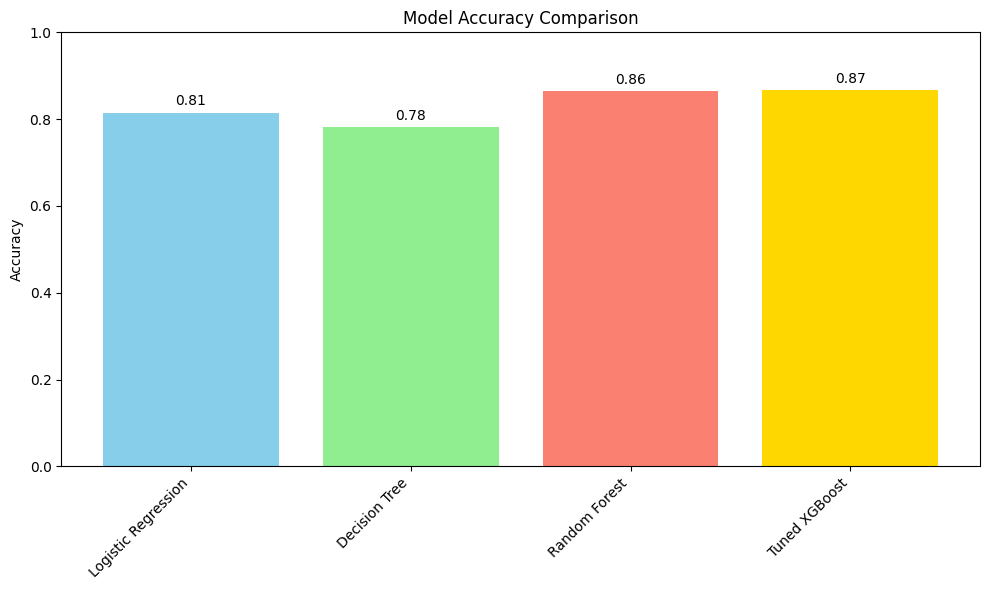

In [ ]:
models_to_compare = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Tuned XGBoost']
accuracy_scores_to_compare = [accuracy_log, accuracy_tree, accuracy_rf, accuracy_best_xgb]

plt.figure(figsize=(10, 6))
bars = plt.bar(models_to_compare, accuracy_scores_to_compare, color=['skyblue', 'lightgreen', 'salmon', 'gold'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

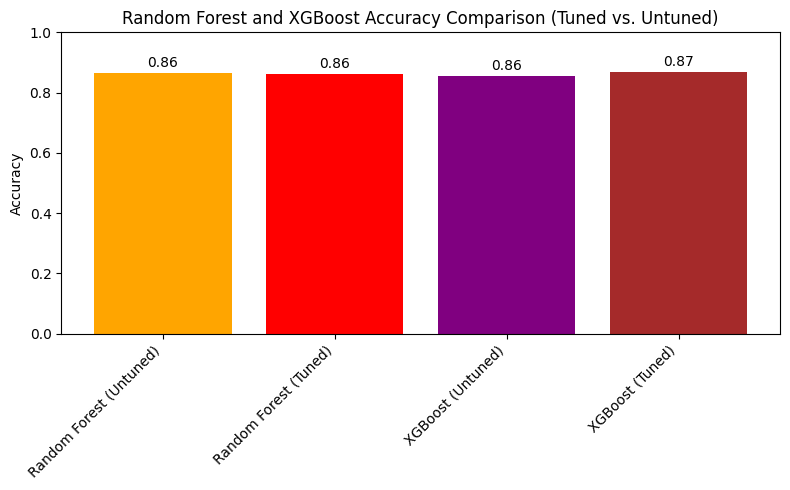

In [ ]:
models = ['Random Forest (Untuned)', 'Random Forest (Tuned)', 'XGBoost (Untuned)', 'XGBoost (Tuned)']
accuracy_scores = [accuracy_rf, accuracy_best_rf, accuracy_xgb, accuracy_best_xgb]


plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracy_scores, color=['orange', 'red', 'purple', 'brown'])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.ylabel('Accuracy')
plt.title('Random Forest and XGBoost Accuracy Comparison (Tuned vs. Untuned)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##CUSTOMER SEGMENTATION


BASED ON LOYALTY


 Feature        | Value
 -------------- | -----
 Tenure         | 6     
 IsActiveMember | 1     
 NumOfProducts  | 2     

 score =  0

 score += 6 * 5           
 score += 1 * 20          
 score += 2 * 10

 Loyalty_Score = 70


In [ ]:
def loyalty_score(row):
    score = 0
    score += row['Tenure'] * 5
    score += row['IsActiveMember'] * 20
    score += row['NumOfProducts'] * 10
    return score

df['Loyalty_Score'] = df.apply(loyalty_score, axis=1)


In [ ]:
def loyalty_segment(score):
    if score >= 70:
        return 'High Loyalty'
    elif score >= 40:
        return 'Medium Loyalty'
    else:
        return 'Low Loyalty'

df['Loyalty_Segment'] = df['Loyalty_Score'].apply(loyalty_segment)


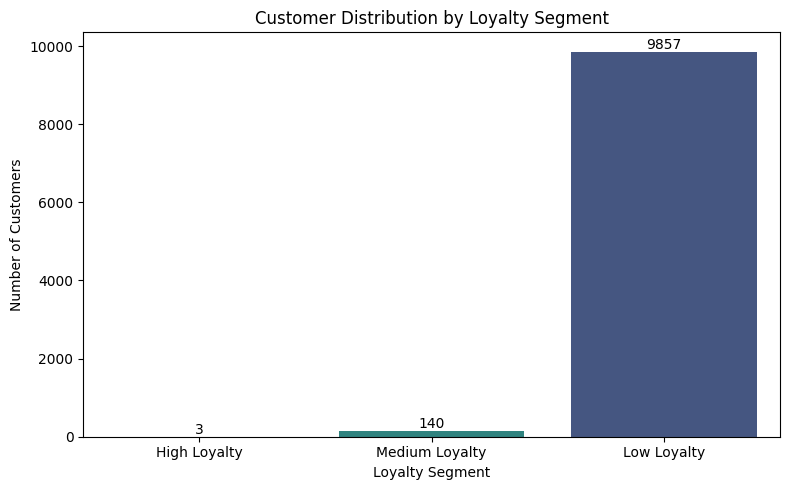

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Loyalty_Segment', data=df, palette='viridis', order=['High Loyalty', 'Medium Loyalty', 'Low Loyalty'], hue='Loyalty_Segment', legend=False)
plt.title("Customer Distribution by Loyalty Segment")
plt.xlabel("Loyalty Segment")
plt.ylabel("Number of Customers")

# Add exact counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

BASED ON CHURN


Churn probability - predicted likelihood (a number between 0 and 1) that a customer will leave (churn) the bank.



In [ ]:
df['Churn_Probability'] = best_xgb_model.predict_proba(X)[:, 1]


In [ ]:
def segment_customer(prob):
    if prob >= 0.7:
        return 'High Risk'
    elif prob >= 0.4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['Segment'] = df['Churn_Probability'].apply(segment_customer)


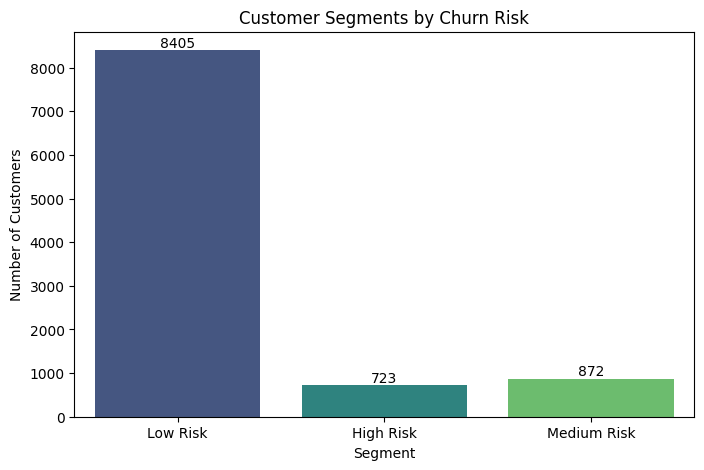

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Segment', data=df, palette='viridis', hue='Segment', legend=False)
plt.title("Customer Segments by Churn Risk")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")

# Add exact counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

##Retention Strategies

1.incentives - lower loan rate,Extra interest on deposits

2.Tools - Budget planner tools,Expense tracking dashboard

3.Rewards - Loyalty points (convertible to gifts/cashback),Free movie/OTT subscriptions

In [ ]:
def assign_strategy(segment):
    if segment == 'High Risk':
        return 'Call + Incentive'
    elif segment == 'Medium Risk':
        return 'Email + Tools'
    else:
        return 'Reward + Refer'

df['Retention_Strategy'] = df['Segment'].apply(assign_strategy)



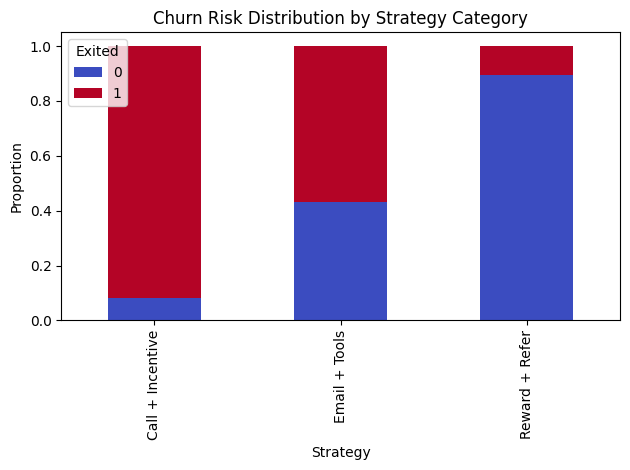

In [ ]:
effectiveness = df.groupby('Retention_Strategy')['Exited'].value_counts(normalize=1).unstack()
effectiveness.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Churn Risk Distribution by Strategy Category")
plt.ylabel("Proportion")
plt.xlabel("Strategy")
plt.legend(title='Exited')
plt.tight_layout()
plt.show()


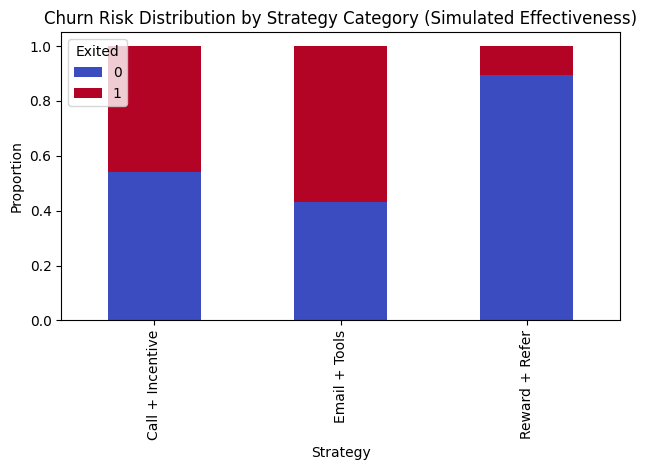

In [ ]:
# Make a copy to modify safely
df_mod = df.copy()

mask = (df_mod['Retention_Strategy'] == 'Call + Incentive') & (df_mod['Exited'] == 1)

# Get the index of the rows where the mask is True and sample from these rows
sampled_indices_to_change = df_mod[mask].sample(frac=0.5, random_state=42).index


df_mod.loc[sampled_indices_to_change, 'Exited'] = 0

# Recompute effectiveness
effectiveness = df_mod.groupby('Retention_Strategy')['Exited'].value_counts(normalize=True).unstack()

# Plot
effectiveness.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Churn Risk Distribution by Strategy Category (Simulated Effectiveness)")
plt.ylabel("Proportion")
plt.xlabel("Strategy")
plt.legend(title='Exited')
plt.tight_layout()
plt.show()

Taller blue section → better strategy

Taller red section → less effective



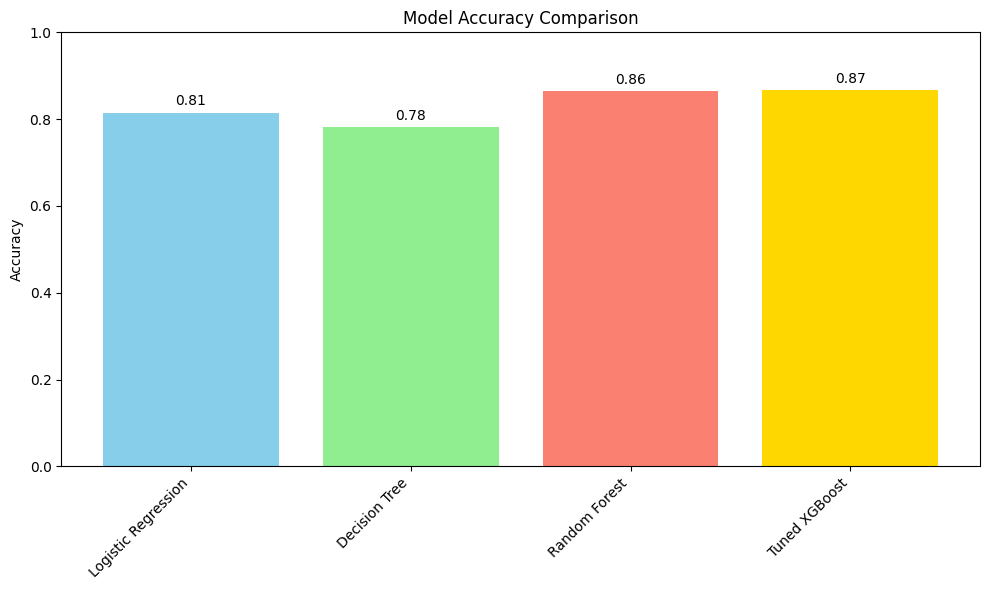

In [ ]:
models_to_compare = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Tuned XGBoost']
accuracy_scores_to_compare = [accuracy_log, accuracy_tree, accuracy_rf, accuracy_best_xgb]

plt.figure(figsize=(10, 6))
bars = plt.bar(models_to_compare, accuracy_scores_to_compare, color=['skyblue', 'lightgreen', 'salmon', 'gold'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Balance vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Balance', data=df, palette='viridis')
plt.title("Customer Balance vs. Churn Status")
plt.xlabel("Exited (0: No, 1: Yes)")
plt.ylabel("Balance")
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned']) # Set the x-axis tick labels
plt.show()

# Plot EstimatedSalary vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, palette='viridis')
plt.title("Estimated Salary vs. Churn Status")
plt.xlabel("Exited (0: No, 1: Yes)")
plt.ylabel("Estimated Salary")
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned']) # Set the x-axis tick labels
plt.show()